# Sigmoidal Fitting

In [1]:
%%capture
%pip install matplotlib numpy scipy lmfit

## Input

Each line must contain either 2 or 3 fields separated by whitespace. 
An easy way is to simply copy/paste values from Excel.

    input_data = """
    <x-value>   <y-value>   [<weight>]
    <x-value>   <y-value>   [<weight>]
    <x-value>   <y-value>   [<weight>]
    [...]
    """

Be aware:
  - All lines must contain the same number of fields.
  - The first and last line must not be deleted.



In [2]:
input_data = """
1 1.486189531 1.0
9 1.54125465 1.0
20 1.692318044 1.0
39 2.017033339 1.0
59 2.184827659 1.0
71 2.22916714 1.0
90 2.398682885 1.0
114.5 2.57838704 1.0
153 2.720853619 1.0
156 2.643373707 0.1
179 2.803670114 1.0
181 2.743127041 0.1
184 2.740362689 0.1
189.5 2.908485019 1.0
224 3.033423755 1.0
"""

## Settings

In [3]:
# range of xaxis and fit prediction
xrange = [0, 280]

# figure width, height in inches
fig_size = 10, 6

# figure DPI
fig_dpi = 100

## Calculation

In [4]:
import math
import re
import sys

import numpy as np
import matplotlib.pyplot as plt

from io import StringIO
from lmfit import Model
from lmfit.models import PolynomialModel

plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['figure.dpi'] = fig_dpi

In [5]:
c = StringIO(input_data.strip())
data = np.loadtxt(c)
xx = data[:, 0]
yy = data[:, 1]

try:
    weights = data[:, 2]
except IndexError:
    weights = None

if xrange is None:
    xrange = [np.min(xx), np.max(xx)]

In [6]:
def sigmoid(x, s0, s1, s2, s3):
    return s0 + s1 / (1 + np.exp(-(x - s2) / s3))

model = Model(sigmoid)
params = model.make_params(
    s0=max(yy), s1=np.median(xx), s2=1, s3=min(yy),
)

result = model.fit(yy, params, x=xx, weights=weights)

xx_fit = np.linspace(xrange[0], xrange[-1], 100)
yy_fit = model.eval(result.params, x=xx_fit)

## Fit result

### Plot

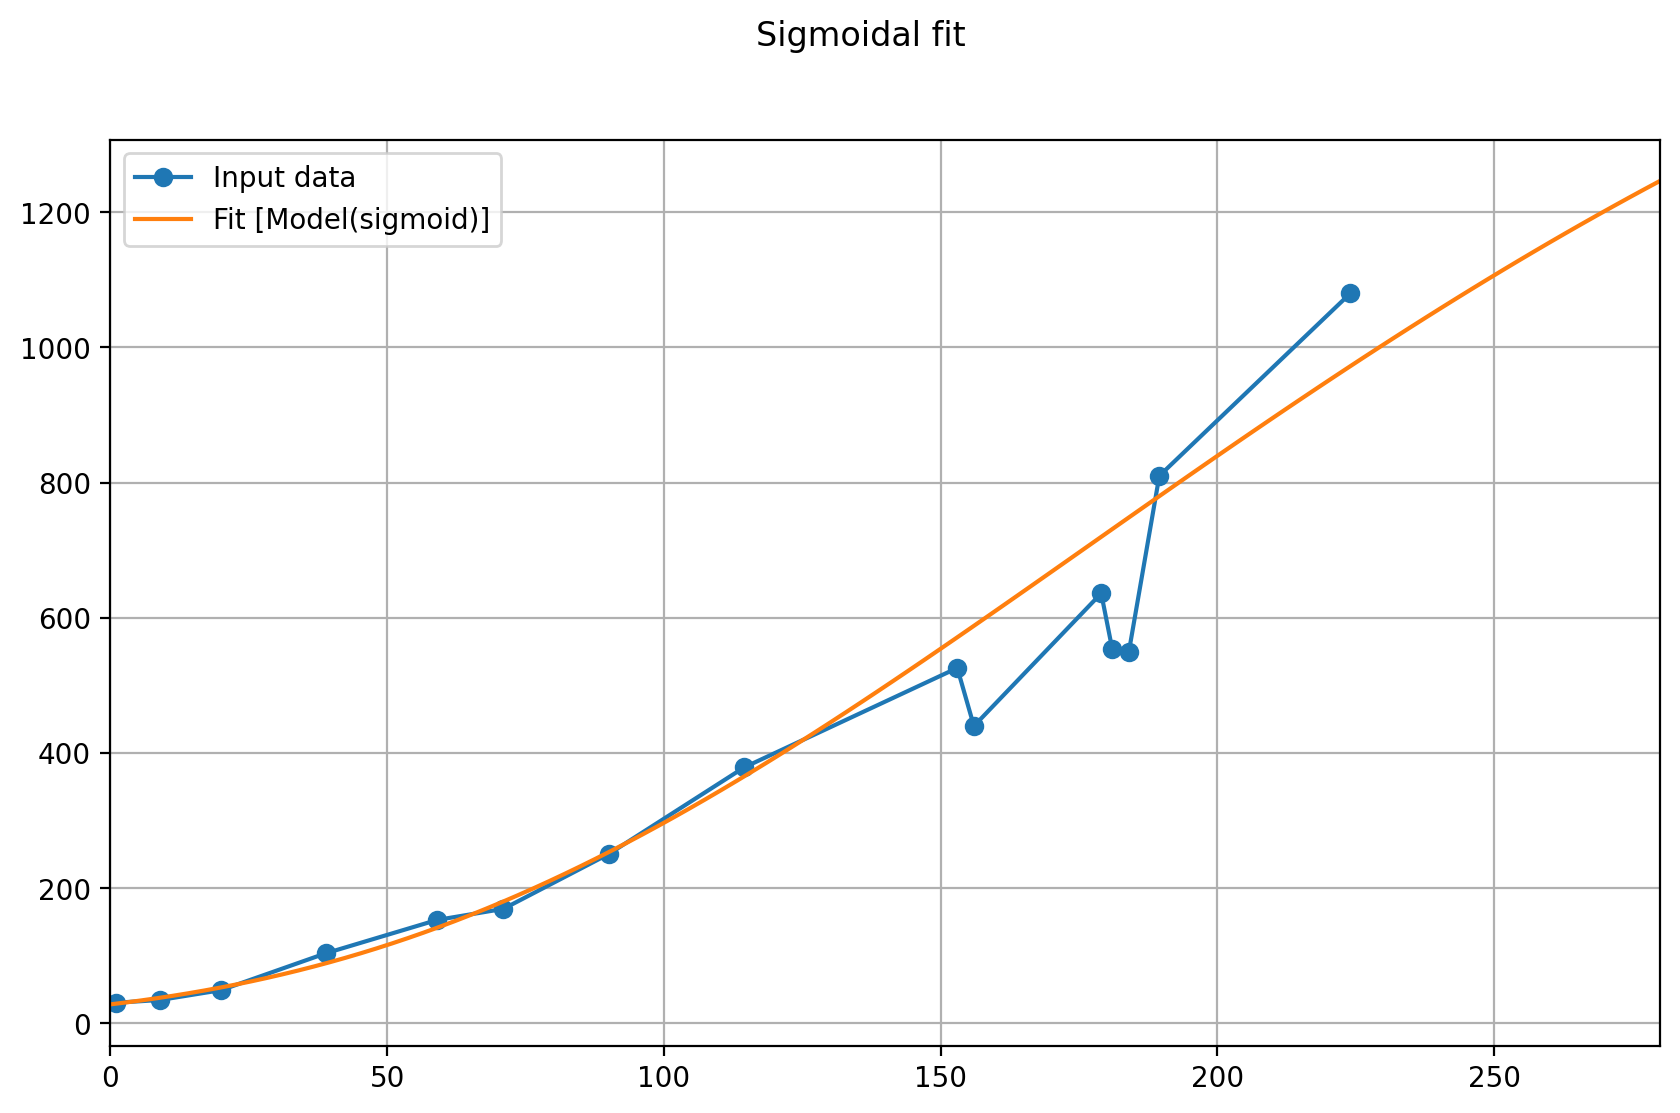

In [7]:
plt.plot(xx, 10 ** yy, marker='o', label='Input data')
plt.plot(xx_fit, 10 ** yy_fit, label=f'Fit [{model.name}]')
plt.xlim(*xrange)
#plt.semilogy()
plt.grid()
plt.legend()
plt.suptitle("Sigmoidal fit")
# plt.tight_layout()
plt.show()

### Report

In [8]:
print(result.fit_report())

[[Model]]
    Model(sigmoid)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 93
    # data points      = 15
    # variables        = 4
    chi-square         = 0.01677936
    reduced chi-square = 0.00152540
    Akaike info crit   = -93.9348392
    Bayesian info crit = -91.1026384
[[Variables]]
    s0: -7199.56663 +/- 1096773.06 (15233.88%) (init = 3.033424)
    s1:  7202.84853 +/- 1096773.08 (15226.94%) (init = 114.5)
    s2: -1013.78049 +/- 18694.1151 (1844.00%) (init = 1)
    s3:  122.480092 +/- 13.4247660 (10.96%) (init = 1.48619)
[[Correlations]] (unreported correlations are < 0.100)
    C(s0, s1) = -1.000
    C(s1, s2) = -1.000
    C(s0, s2) = 1.000
    C(s2, s3) = -0.367
    C(s1, s3) = 0.362
    C(s0, s3) = -0.362


### Values

In [9]:
result_data = np.column_stack((data[:, 0], result.best_fit))
np.savetxt(sys.stdout, result_data, fmt=['%g', '%.5f'])

1 1.46577
9 1.58057
20 1.72668
39 1.95011
59 2.15072
71 2.25628
90 2.40364
114.5 2.56285
153 2.75678
156 2.76949
179 2.85721
181 2.86409
184 2.87420
189.5 2.89210
224 2.98779
